In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [4]:
df_initial = pd.read_csv('v1.0.3/skills_en.csv')
df_initial.head()

,conceptType,conceptUri,skillType,reuseLevel,preferredLabel,altLabels,hiddenLabels,status,modifiedDate,scopeNote,definition,inScheme,description
0,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/0005c151-5b5a...,skill/competence,sector-specific,manage musical staff,manage staff of music\ncoordinate duties of mu...,NaN,released,2016-12-20T17:43:43Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skil...,Assign and manage staff tasks in areas such as...
1,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/00064735-8fad...,skill/competence,occupation-specific,supervise correctional procedures,oversee prison procedures\nmanage correctional...,NaN,released,2016-12-20T20:17:49Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/memb...,Supervise the operations of a correctional fac...
2,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/000709ed-2be5...,skill/competence,sector-specific,apply anti-oppressive practices,apply non-oppressive practices\napply an anti-...,NaN,released,2016-12-20T19:18:19Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skil...,"Identify oppression in societies, economies, c..."
3,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/0007bdc2-dd15...,skill/competence,sector-specific,control compliance of railway vehicles regulat...,monitoring of compliance with railway vehicles...,NaN,released,2016-12-20T20:02:19Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skil...,"Inspect rolling stock, components and systems ..."
4,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/00090cc1-1f27...,skill/competence,cross-sector,identify available services,establish available services\ndetermine rehabi...,NaN,released,2016-12-20T20:15:17Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/memb...,Identify the different services available for ...


In [5]:
df_initial.sort_values('preferredLabel', inplace=True)
df_initial.head()

,conceptType,conceptUri,skillType,reuseLevel,preferredLabel,altLabels,hiddenLabels,status,modifiedDate,scopeNote,definition,inScheme,description
8292,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/9bc3b9ae-50d8...,knowledge,sector-specific,3D body scanning technologies,technologies for body scanning\n3D body scan t...,NaN,released,2017-01-03T10:39:38Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skil...,The principles and usage of technologies for 3...
5890,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/6e53fd99-b646...,knowledge,sector-specific,3D lighting,NaN,NaN,released,2016-08-04T15:19:19Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/memb...,The arrangement or digital effect which simula...
8075,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/97965983-0da4...,knowledge,cross-sector,3D modelling,3D designing\nthree-dimensional modelling\n3D ...,NaN,released,2016-12-20T20:03:02Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skil...,The process of developing a mathematical repre...
2311,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/2afb2b59-c9a3...,knowledge,sector-specific,3D printing process,NaN,NaN,released,2016-08-04T15:19:23Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/memb...,The process of reproducing 3D objects by using...
3334,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/3e7516dc-0f7c...,knowledge,sector-specific,3D texturing,NaN,NaN,released,2016-08-04T15:19:19Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/memb...,The process of applying a type of surface to a...


In [6]:
df_initial.tail()

,conceptType,conceptUri,skillType,reuseLevel,preferredLabel,altLabels,hiddenLabels,status,modifiedDate,scopeNote,definition,inScheme,description
6312,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/76654176-5cc8...,knowledge,cross-sector,zoning codes,zoning rules\nzoning regulations\nzoning laws\...,NaN,released,2016-12-20T20:28:27Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skil...,The division of land into zones where various ...
3325,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/3e56a2b6-6316...,knowledge,sector-specific,zoo community,zoo and aquarium community\nzoo communities\np...,NaN,released,2017-01-05T11:01:51Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/memb...,"Zoo and aquarium community on a local, regiona..."
12802,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/f35fa66a-32bd...,knowledge,sector-specific,zoo exhibit design,zoo exhibit plan\nzoo exhibit model\nzoo exhib...,NaN,released,2016-12-20T17:59:54Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/memb...,Understand the various factors that influence ...
2125,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/27e8f919-3ae1...,knowledge,cross-sector,zoo regulations,zoo regulating practices\nzoo regulation\nzoo ...,NaN,released,2017-01-03T14:23:51Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skil...,"National, regional and international regulatio..."
12841,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/f40f94f2-1d6d...,knowledge,sector-specific,zoonotic diseases,zoonotic illnesses\nzoonoses\nzoonotic illness...,NaN,released,2016-12-20T21:21:02Z,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skil...,Zoonoses are infectious diseases of animals th...


In [7]:
df_initial.shape

(13485, 13)

In [8]:
df_extract = df_initial[['preferredLabel', 'description']].copy()
df_extract.insert(0, 'skill_ID', range(0, 0+len(df_extract)))
df_extract.head()

,skill_ID,preferredLabel,description
8292,0,3D body scanning technologies,The principles and usage of technologies for 3...
5890,1,3D lighting,The arrangement or digital effect which simula...
8075,2,3D modelling,The process of developing a mathematical repre...
2311,3,3D printing process,The process of reproducing 3D objects by using...
3334,4,3D texturing,The process of applying a type of surface to a...


In [9]:
df_extract.tail()

,skill_ID,preferredLabel,description
6312,13480,zoning codes,The division of land into zones where various ...
3325,13481,zoo community,"Zoo and aquarium community on a local, regiona..."
12802,13482,zoo exhibit design,Understand the various factors that influence ...
2125,13483,zoo regulations,"National, regional and international regulatio..."
12841,13484,zoonotic diseases,Zoonoses are infectious diseases of animals th...


In [10]:
len(df_extract)

13485

In [11]:
import re
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()

def cleaner(rows):
    description = rows['description']
    description = description.lower()
    description = re.sub(r'[?|!|\'|"|#]',r'', description)
    description = re.sub(r'[.|,|)|(|\|/]',r' ', description)
    words = [lemmatiser.lemmatize(word) for word in description.split() if word not in stop]
    return words

In [12]:
df_extract['mid_description'] = df_extract.apply(cleaner, axis=1)

In [13]:
df_extract

,skill_ID,preferredLabel,description,mid_description
8292,0,3D body scanning technologies,The principles and usage of technologies for 3...,"[principle, usage, technology, 3d, body, scann..."
5890,1,3D lighting,The arrangement or digital effect which simula...,"[arrangement, digital, effect, simulates, ligh..."
8075,2,3D modelling,The process of developing a mathematical repre...,"[process, developing, mathematical, representa..."
2311,3,3D printing process,The process of reproducing 3D objects by using...,"[process, reproducing, 3d, object, using, 3d, ..."
3334,4,3D texturing,The process of applying a type of surface to a...,"[process, applying, type, surface, 3d, image]"
...,...,...,...,...
6312,13480,zoning codes,The division of land into zones where various ...,"[division, land, zone, various, us, activity, ..."
3325,13481,zoo community,"Zoo and aquarium community on a local, regiona...","[zoo, aquarium, community, local, regional, gl..."
12802,13482,zoo exhibit design,Understand the various factors that influence ...,"[understand, various, factor, influence, effec..."
2125,13483,zoo regulations,"National, regional and international regulatio...","[national, regional, international, regulation..."


In [14]:
# join words together
def join_word(rows):
    word_lst = rows['mid_description']
    joined_words = ( " ".join(word_lst))
    return joined_words

In [15]:
joined_word = df_extract.apply(join_word, axis=1)
joined_word

8292     principle usage technology 3d body scanning us...
5890     arrangement digital effect simulates lighting ...
8075     process developing mathematical representation...
2311     process reproducing 3d object using 3d printin...
3334                process applying type surface 3d image
                               ...                        
6312     division land zone various us activity allowed...
3325     zoo aquarium community local regional global s...
12802    understand various factor influence effective ...
2125     national regional international regulation rel...
12841    zoonosis infectious disease animal naturally t...
Length: 13485, dtype: object

In [16]:
df_extract['cleaned description'] = joined_word
df_extract

,skill_ID,preferredLabel,description,mid_description,cleaned description
8292,0,3D body scanning technologies,The principles and usage of technologies for 3...,"[principle, usage, technology, 3d, body, scann...",principle usage technology 3d body scanning us...
5890,1,3D lighting,The arrangement or digital effect which simula...,"[arrangement, digital, effect, simulates, ligh...",arrangement digital effect simulates lighting ...
8075,2,3D modelling,The process of developing a mathematical repre...,"[process, developing, mathematical, representa...",process developing mathematical representation...
2311,3,3D printing process,The process of reproducing 3D objects by using...,"[process, reproducing, 3d, object, using, 3d, ...",process reproducing 3d object using 3d printin...
3334,4,3D texturing,The process of applying a type of surface to a...,"[process, applying, type, surface, 3d, image]",process applying type surface 3d image
...,...,...,...,...,...
6312,13480,zoning codes,The division of land into zones where various ...,"[division, land, zone, various, us, activity, ...",division land zone various us activity allowed...
3325,13481,zoo community,"Zoo and aquarium community on a local, regiona...","[zoo, aquarium, community, local, regional, gl...",zoo aquarium community local regional global s...
12802,13482,zoo exhibit design,Understand the various factors that influence ...,"[understand, various, factor, influence, effec...",understand various factor influence effective ...
2125,13483,zoo regulations,"National, regional and international regulatio...","[national, regional, international, regulation...",national regional international regulation rel...


In [17]:
del df_extract['mid_description']
df_extract

,skill_ID,preferredLabel,description,cleaned description
8292,0,3D body scanning technologies,The principles and usage of technologies for 3...,principle usage technology 3d body scanning us...
5890,1,3D lighting,The arrangement or digital effect which simula...,arrangement digital effect simulates lighting ...
8075,2,3D modelling,The process of developing a mathematical repre...,process developing mathematical representation...
2311,3,3D printing process,The process of reproducing 3D objects by using...,process reproducing 3d object using 3d printin...
3334,4,3D texturing,The process of applying a type of surface to a...,process applying type surface 3d image
...,...,...,...,...
6312,13480,zoning codes,The division of land into zones where various ...,division land zone various us activity allowed...
3325,13481,zoo community,"Zoo and aquarium community on a local, regiona...",zoo aquarium community local regional global s...
12802,13482,zoo exhibit design,Understand the various factors that influence ...,understand various factor influence effective ...
2125,13483,zoo regulations,"National, regional and international regulatio...",national regional international regulation rel...


In [18]:
df_extract.loc[8292]['description']

'The principles and usage of technologies for 3D body scanning used to capture the size and shape of the human body.'

In [19]:
df_extract.loc[8292]['cleaned description']

'principle usage technology 3d body scanning used capture size shape human body'

In [105]:
#Most commonly occuring raw_extract skill description
most_common_raw = pd.Series(' '.join(df_extract['description']).split()).value_counts()[:100]
len(most_common_raw)

100

In [97]:
#Most commonly occuring cleaned skill description
most_common_cleaned = pd.Series(' '.join(df_extract['cleaned description']).split()).value_counts()[:100]

In [106]:
most_common_raw[0:10]

and     20236
the     15483
of      10641
to       9076
in       5802
a        4276
or       4208
as       3310
for      3144
such     2463
dtype: int64

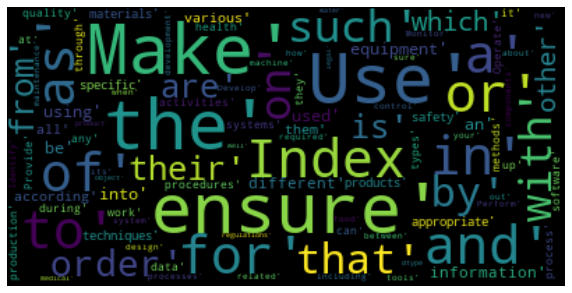

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words=100, max_font_size=50).generate(str(most_common_raw.index))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

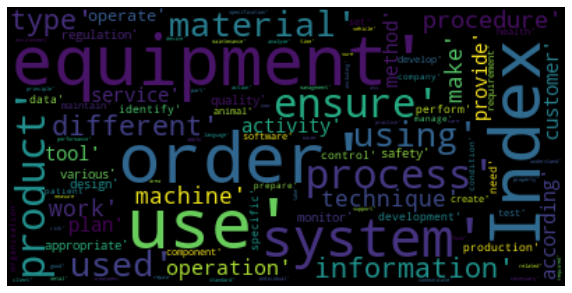

In [109]:
# Commonly occuring words after cleaning
wc = WordCloud(max_words=100, max_font_size=50).generate(str(most_common_cleaned.index))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
df_extract.to_pickle('clean_esco_skill.pkl')

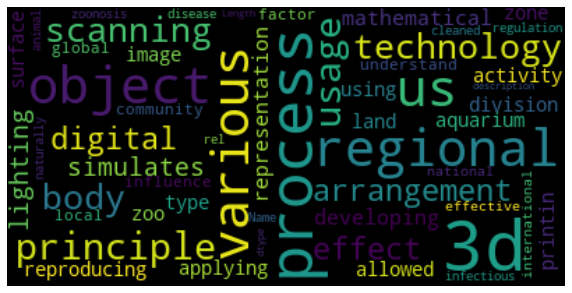

In [111]:
# Words in skill description after cleaning
wc = WordCloud(max_words=100, max_font_size=50).generate(str(df_extract['cleaned description']))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()